# Lecture 7: Overfitting and Regularization - 2

COMP 3921F \
Applied Machine Learning \
Mon 4:40 PM - 5:55 PM \
Tue: 5:00 PM - 6:15 PM

Professor: __Ramesh Natarajan__ \
Email: **ramesh.natarajan@yu.edu** \
Department of Computer Science \
Stern College and Yeshiva University

Date: Feb 12, 2024



## Acknowledgements

1. The starting point for developing the notebook-based instruction material was the set of notebooks provided by the previous  course instructor__[Prof. Zach Glassman](https://www.linkedin.com/in/zachary-glassman-7088844b/)__.
2. These notebooks have been augmented by similar instruction material taken from many, many other sources, including official documentation from many ML libraries and frameworks. I have adapted and modified the content where needed to make it compatible with student level, orientation and proficiency in this course.
3. The primary addition sources include:
   1. Course content from V. Kuleshov, Cornell Tech __[repo](https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/blob/main/notebooks/lecture1-introduction.ipynb)__.
   2. Book and support material from Hal Daume II, __[A course in Machine Learning](http://ciml.info)__. __[repo](https://github.com/hal3/ciml/)__
   3. Book and support material from A. Geron, __[Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow (3rd edition)](https://homl.info/er3)__. __[repo](https://github.com/ageron/handson-ml3/blob/main/README.md)__




# Announcements

1. Problem Set 2 is due on Feb 14  
2. Recitations will review Linear Models 2.
3. You should continue  to review and refresh yourself on the mathematical prerequisites for applied machine learning from part 1 for Deisenroth, Faisal and Ong, __[Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)__.



# Overfitting and Regularization 


<table>
    <td width="40%"><center>
        <img src="./img/Lecture-06/overfitting-creative.png" />      
    </center>
    Generated by Chat-GPT 
     </td>  
    <td>

We have seen that the model accuracy on the training data set decreses continuously as the model complexity is increased.  At the same time the corresponding test data set accuracy first decreases and then increases as the model complexity is increased (unless the model already incorporates, under the covers, some of the regularization techniques that are described in this lecture). 


<center>
 <img src="./img/Lecture-06/train-test-error.png" />    
</center>


</td></table> 


# Model Complexity

 Typically when training decision trees for classification, the node splitting during training is continued till all the nodes are "pure", i.e. consist of training examples that belong to a single class. The pruning step then works backwards absorbing leaf nodes with the smallest impurity gain into the parent nodes, In reverse pruning order, this results in a set of models  $\cal{M}_0, \cal{M}_1, \cal{M}_2 \ldots$  of increasing model complexity, which are nested so that $\cal{M}_0 \subset \cal{M}_1 \subset \cal{M}_2 \ldots$ etc. The measure of the model complexity for each model decsion tree in this sequence could be the number of nodes in the decision tree.   

Similarly for linear models, one can imagine a set of nested models $\cal{M}_0, \cal{M}_1, \cal{M}_2 \ldots$ with and increasing number of features, and the model complexity could just be the number of non-zero model coefficients $\theta$ - in vector space terminology, is known as the **cardinality** of the coefficient vector, and is the same as the $l_0$ norm of the coefficient vector $\theta$ and  denoted by $||\theta||_0$. From your __[linear algebra review](https://mml-book.github.io/book/mml-book.pdf)__  you may be aware that all vector norms (including $l_1, l_2$ etc. are equivalent and therefore any of these norms can also be a measure of model complexity. 

 

## Loss functions and Regularization

In the previous Lectures we have seen that in order to avoid overfitting, it is advisable to avoid models that have a large model complexity. This is best done by adding a "penalty term"  $\cal{R}$ involving this model complexity to the loss function $\cal{L}$ used for model training: 

$${\cal{L}}_{\lambda}(\theta)=  {\cal{L}}(\theta) + {\lambda}  {\cal{R}}(\theta) $$

where $\theta$ denotes the vector of model coefficients, and $\lambda$ is a 'hyperparameter' of the fitting algorithm whose value balances the model estimation between decreasing training error reduction and keeping the model complexity small.  For small values of $\lambda$ the models will overfit and for larger values of $\lambda$ the models with underfit.

The optimal value $\lambda_{opt}$ can be obtained by using a grid search over the range of potential values of $\lambda$

As mentioned earlier,  the model complexity for linear models can be measured by the norm of the coeeficient vector $\theta$, and the penalty term will penalizer large values of $||\theta||$.   For example, using the the $p$-norm of $\theta$

$$\cal{R}(\theta) = ||\theta||_p = \left(\sum_d|\theta_d|^p\right)^{1/p}$$

However, typically we use the $l_1 = ||\theta||_1 = \sum|\theta_i|$ or $l_2 = ||\theta||_2 = \sqrt{\sum \theta_i^2}$ norms.  

#  Properties of $l_p$-norm Regularization 

For the linear model 

\begin{align*}
y = X\theta + \epsilon,
\end{align*}
the regularized loss function is 
\begin{align*}
{\cal{L}}_{\lambda}(\theta)=  \frac{1}{2} ||y -X\theta||^2 + {\lambda}  {\cal{R}}(\theta)
\end{align*}
- $l_0$ regularization is equivalent to best subset selection, i.e. finding the best subset of non-zero coefficients; however there are no efficient algorithms for this since the search space is combinatorial.
  
-  $l_1$ regularization leads to sparse solutions with many of the coefficients being forced to zero; There are efficicient algorithms e.g. the Lasso; however, if 2 features are essentially identical then only one of them gets selected whereas it might be more useful to have both features have identical coefficients
  
-  $l_2$ regularization is widely used, the coefficients have an exact solution in terms of the normal equations, and optimization based approaches can also be used since this norm is differentiable; however does not lead to sparse solutions but handles the case of collinear features quite well.
  
- $l_p$ regularization for $p > 2$ is rarely used.
  
- $l_1$ + $l_2$ regularization is an interesting variant called the Elastic Net; has 2 hyperparameters instead of 1 to optimize but leads to solutions which consist of sparse groups of coefficients, and each group consisting of collinear features whose coefficients are weighted equally.

# Ridge Regression ($l2$ norm loss function and $l2$ norm penalty)

As in an earlier lecture, consider pre-transformed data with the target variable centered to have mean zero (i.e. by substracting the target mean from the original target vector), and the features  "standardized" to have mean zero and standard deviation 1.   

The linear regression model with this pre-transformed data can be fitted without an explicit intercept term,  and magnitude of the individual linear coefficients provides their relative importance to the model (since all the features are measured on the same scale).

The case of the  $l_2$ norm loss function with the $l_2$ norm regularization is known as **Ridge Regression**. Since this loss function is quadratic in the gradients, it's gradients  can be computed explicitly.

\begin{align*}
\nabla_\theta \cal{L}(\theta) 
& = \nabla_\theta \frac{1}{2} (X \theta - y)^T  (X \theta - y) + \frac{1}{2} \lambda \theta^T \theta \\
& = (X^T X) \theta - X^T y + \lambda \theta^T \theta
\end{align*}


Setting the gradient of the loss function to zero, we obtain the * regularized normal equations*:
$$ (X^T X + \lambda I) \theta = X^T y.$$

where $I$ is the Hence, the value $\hat{\theta}$ that minimizes this objective is given by:
$$ \hat{\theta} = (X^T X + \lambda I )^{-1} X^T y.$$



# Singular Values, Eigenvalues and Collinearity

It is interesting to see the effect of the regularization term on the properties of the matrix $(X^T X + \lambda I )$. 

Note that the matrix $(X^T X)$ is always invertible for any $\lambda > 0$, whereas it may not be invertible for $\lambda = 0$. 

When there are redundant features in a linear regression model (that is features that can be expressed as an exact linear combination of other features) this is known as **feature collinearity**.  

When this happens the $n \times d$ design matrix $X$ has reduced rank, that is $\text{rank}(X) < d$, and in the case the $d\times d$ matrix $X^T X$ is said to be **singular** and is no longer invertible. 


# Numerical Issues

Numerical difficulties during the inversion of $X^TX$ can arise even if the features are not perfectly collinear, but almost collinear (think of higher-order monomial features, which differ very little from each other on a finite interval. 

Here although the inversion of $X^TX$ is possible, the resulting model coefficients can exhibit wide swings depending on the data set,  since the individual contributions from the collinear features will cancel each other out.  

A good measure of the "invertibility" of $X^TX$ is obtained by looking at the distribution of the eigenvalues (equivalently the singular values) of the $d\times d$ matrix $X^TX$.  

In particular, if $\sigma_1 > \sigma_2 > \ldots, > \sigma_d$ are the singular values of $X^T X$, then the quantity

$$\text{cond}(X^T X) = \sigma_1/sigma_d$$

is the **condition number** of $X^TX$.  

**Regularization** acts by limits the magnitude of these wild swings, which reduces the variance of the model parameter estimates, thereby preventing overfitting; note however, that the parameter estimates will  no longer be unbiased. 

singular values of X: 
 [1.53687233e+01 1.51282867e+01 4.44904447e+00 3.63916485e+00
 1.14060078e+00 7.39121587e-01 1.98783524e-01 1.11380920e-01
 2.14134347e-02 1.08462740e-02]
sqrt of eigenvalues of (X^TX): 
 [1.53687233e+01 1.51282867e+01 4.44904447e+00 3.63916485e+00
 1.14060078e+00 7.39121587e-01 1.98783524e-01 1.11380920e-01
 2.14134347e-02 1.08462740e-02]

Condition Number of (X^TX): 0.026565707784436347



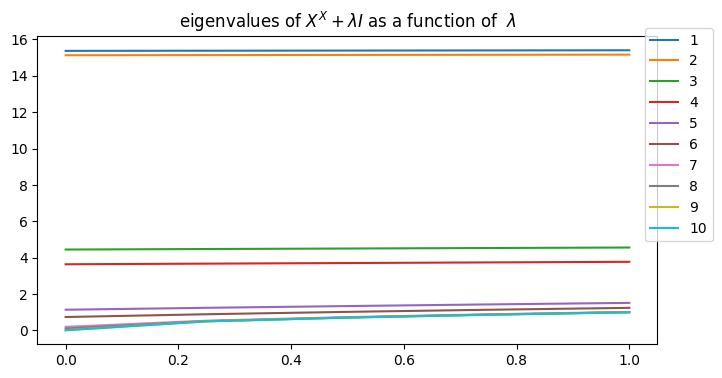

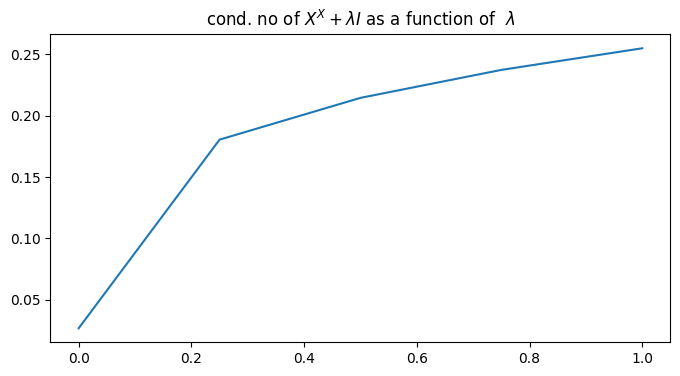

In [3]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
import warnings
warnings.filterwarnings("ignore")

n = 50
n_ord = 10
xrange = (-5.0, 5.)
x = np.linspace(min(xrange), max(xrange),n)
ftrs = np.delete(PolynomialFeatures(n_ord).fit_transform(x[:, np.newaxis]),0, axis=1)

standardized_ftrs = StandardScaler().fit_transform(ftrs)

# lets look at the singular values of X 
S = np.linalg.svd(standardized_ftrs, compute_uv = False)
print(f"singular values of X: \n {S}")

eigvalsh = np.sqrt(np.linalg.eigvalsh(standardized_ftrs.T @ standardized_ftrs))[::-1]
print(f"sqrt of eigenvalues of (X^TX): \n {eigvalsh}")
print(f"\nCondition Number of (X^TX): {np.sqrt(eigvalsh[-1]/eigvalsh[0])}\n") 
lambdas = np.linspace(0, 1, int(1/0.2))
eigvalshs = []
cond_nos = []
for lamb in lambdas:
    eigvalsh = np.sqrt(np.linalg.eigvalsh(standardized_ftrs.T @ standardized_ftrs + 
                                  lamb * np.identity(standardized_ftrs.shape[1])))[::-1]
    # print(f"sqrt of eigenvalues of (X^TX) + {lamb} I: \n {eigvalsh[::-1]}")
    eigvalshs.append(eigvalsh)
    cond_nos.append(np.sqrt(eigvalsh[-1]/eigvalsh[0]))
               
for i, eig in enumerate(np.array(eigvalshs).T):
    plt.plot(lambdas, eig, label=f"{i+1}")
plt.title("eigenvalues of $X^X + \lambda I$ as a function of  $\lambda$")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


plt.plot(lambdas, cond_nos)
plt.title("cond. no of $X^X + \lambda I$ as a function of  $\lambda$")
plt.show()

# Practical Example of Regularization ($l_1$ norm) 

Lets look at how regularization works with a real data set (i.e. the diabetes data set we used in an earlier lecture). 

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

bunch = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(bunch['data'], bunch['target'])

Now lets look at how the model coefficients change as the regularization parameter  $\alpha$ in increased

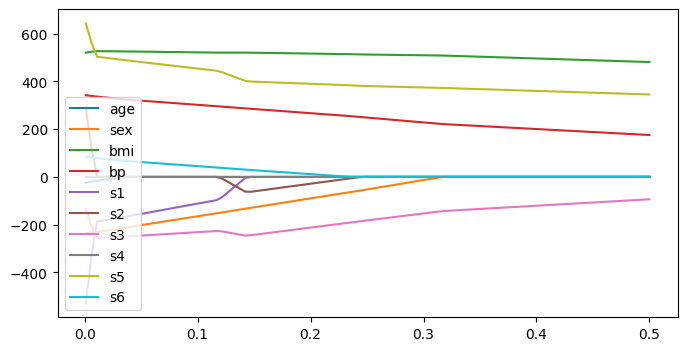

In [3]:
alphas = np.linspace(0.001, .5, 100)
weights = []
for alpha in alphas:
    l_model = Lasso(alpha=alpha).fit(X_train, y_train)
    weights.append(l_model.coef_)
for i, weight in enumerate(np.array(weights).T):
    plt.plot(alphas, weight, label=bunch['feature_names'][i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

# Summary

- Previously we have stated that overfitting is related to the model complexity, that is the number of parameters in the model
- Another interpretation of overfitting is that it is related to the tradeoff between bias and variance, and models with high model complexity have a low bias but higher variance leading to overfitting.
- A third interpretation here is that it is related to parameter redundancy (in the linear model, this is equivalent to feature redundancy) which leads parameter estimates with high variance. 
- In all three cases, the use of regularization on the model parameters constrains the "model complexity" and reduces overfitting.
- A single "regularization parameter" $\lambda$ captures the tradeoff between underfitting and overfitting for a nested sequence of models.  
- $\lamba$ is a model hyper-parameter whose optimum value can be found via a grid search over the test set accuracy metrics. 